# KNN 이진분류 (Citrus 데이터셋)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/citrus.csv

--2025-02-09 12:25:11--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/citrus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308294 (301K) [text/plain]
Saving to: ‘citrus.csv.1’

citrus.csv.1        100%[===================>] 301.07K  --.-KB/s    in 0.02s   

2025-02-09 12:25:11 (13.2 MB/s) - ‘citrus.csv.1’ saved [308294/308294]



In [ ]:
df = pd.read_csv('citrus.csv')
df.shape

(10000, 6)

In [ ]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


## 2. 전체 정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


### 범주형 변수

In [ ]:
# 오렌지와 그레이프 후르츠 개수 확인
df['name'].value_counts()

,count
name,
orange,5000
grapefruit,5000


### 연속형 변수

In [ ]:
# 오렌지 데이터만 추출
df_orange = df[df['name'] == 'orange']
# df_orange = df.loc[df['name']=='orange',:]
df_orange.shape

(5000, 6)

In [ ]:
# 자몽 데이터만 추출
df_grapefruit = df[df['name'] == 'grapefruit']
# df_orange = df.loc[df['name']=='orange',:]
df_grapefruit.shape

(5000, 6)

<Axes: xlabel='weight', ylabel='Count'>

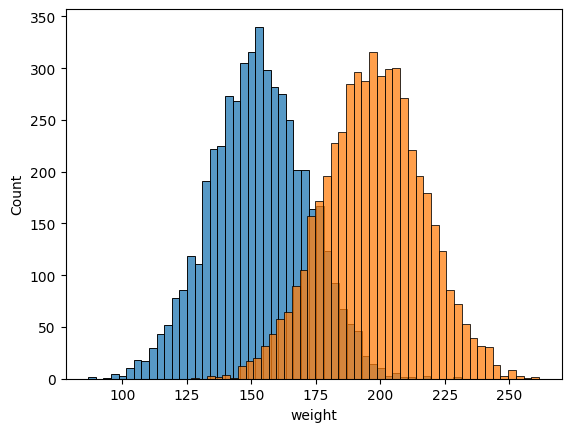

In [ ]:
# 시각화

sns.histplot(data=df_orange, x = 'weight')
sns.histplot(data=df_grapefruit, x = 'weight')

## 3. 결측치

In [ ]:
df.isna().sum()

,0
name,0
diameter,0
weight,0
red,0
green,0
blue,0


<Axes: >

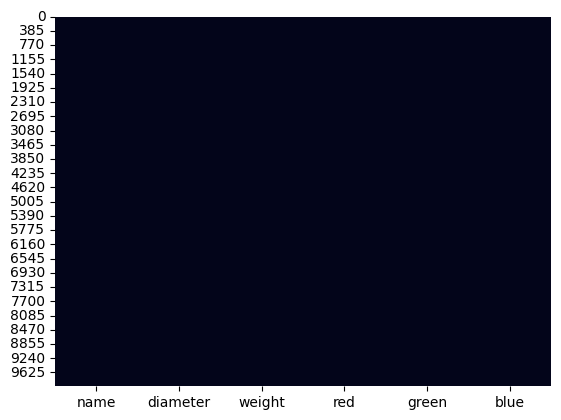

In [ ]:
sns.heatmap(df.isna(), cbar=False) # 결측치 없음

In [ ]:
# 이상치, 중복치 확인

## 4. 데이터 분리
- 학습용, 검증용, 테스트용 데이터 분리

In [ ]:
df.head(20)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
5,orange,4.59,95.86,142,100,2
6,orange,4.64,97.94,156,85,2
7,orange,4.65,98.50,142,74,2
8,orange,4.68,100.20,159,90,16
9,orange,4.69,100.31,161,76,6


In [ ]:
# 데이터 셔플
df = df.sample(frac=1)

In [ ]:
df.head(20)

,name,diameter,weight,red,green,blue
9427,grapefruit,12.97,220.49,168,73,2
8334,grapefruit,12.01,205.82,150,74,2
3859,orange,9.41,167.02,169,68,2
9789,grapefruit,13.58,230.35,149,70,31
5735,grapefruit,10.18,176.95,158,79,9
8396,grapefruit,12.06,206.41,148,66,22
4516,orange,10.10,177.22,161,81,2
8233,grapefruit,11.93,204.76,164,52,2
4874,orange,10.95,188.51,171,97,2
4175,orange,9.68,171.36,158,88,9


In [ ]:
idx_train = int(len(df)*0.6)
idx_val = int(len(df)*0.8)
idx_train, idx_val

(6000, 8000)

In [ ]:
train = df.iloc[:idx_train,:]
val = df.iloc[idx_train:idx_val,:]
test = df.iloc[idx_val:,:]

In [ ]:
train.shape, val.shape, test.shape

((6000, 6), (2000, 6), (2000, 6))

### x, y 데이터 분리

In [ ]:
train.head()
# y = name, x = 나머지 col

,name,diameter,weight,red,green,blue
9427,grapefruit,12.97,220.49,168,73,2
8334,grapefruit,12.01,205.82,150,74,2
3859,orange,9.41,167.02,169,68,2
9789,grapefruit,13.58,230.35,149,70,31
5735,grapefruit,10.18,176.95,158,79,9


In [ ]:
train.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [ ]:
x_train = train.drop('name', axis=1) # 이름 (y) 제외 나머지
y_train = train['name'] # 이름(y)만
x_val = val.drop('name', axis=1)
y_val = val['name']

In [ ]:
x_train.head()

,diameter,weight,red,green,blue
9427,12.97,220.49,168,73,2
8334,12.01,205.82,150,74,2
3859,9.41,167.02,169,68,2
9789,13.58,230.35,149,70,31
5735,10.18,176.95,158,79,9


In [ ]:
y_train.head()

,name
9427,grapefruit
8334,grapefruit
3859,orange
9789,grapefruit
5735,grapefruit


### 스케일링

In [ ]:
u = x_train.mean()
s = x_train.std()

In [ ]:
u, s

(diameter      9.986935
 weight      175.222335
 red         153.936833
 green        76.093833
 blue         11.213000
 dtype: float64,
 diameter     1.935069
 weight      29.009046
 red         10.306610
 green       11.572425
 blue         9.044663
 dtype: float64)

In [ ]:
x_train_s = (x_train-u)/s
x_train_s

,diameter,weight,red,green,blue
9427,1.541580,1.560467,1.364480,-0.267345,-1.018612
8334,1.045474,1.054763,-0.381972,-0.180933,-1.018612
3859,-0.298147,-0.282751,1.461505,-0.699407,-1.018612
9789,1.856814,1.900361,-0.478997,-0.526582,2.187699
5735,0.099772,0.059556,0.394229,0.251129,-0.244675
...,...,...,...,...,...
9240,1.427889,1.442573,0.394229,-1.649942,-0.355237
9528,1.613929,1.629411,-0.770072,-0.094521,-0.908049
4912,0.611381,0.566984,0.588279,-1.563530,-0.686924
9146,1.381379,1.395002,-0.770072,-0.785819,-1.018612


In [ ]:
x_val_s = (x_val-u)/s
x_val_s

,diameter,weight,red,green,blue
5789,0.125610,0.091270,-1.837348,-1.304293,1.082075
7491,0.750911,0.761406,0.976380,1.201664,1.524324
3779,-0.344657,-0.326875,-0.867097,2.411436,-1.018612
7090,0.626884,0.624552,2.334731,-1.649942,-1.018612
9713,1.774130,1.803495,1.170430,0.078304,1.082075
...,...,...,...,...,...
9763,1.820640,1.855548,0.588279,-0.526582,0.971512
178,-1.977673,-1.941544,-0.381972,0.164716,-1.018612
3604,-0.411838,-0.396164,-0.867097,-0.353758,-1.018612
4667,0.197959,0.189860,0.006129,0.251129,-0.576362


In [ ]:
label_dic = {'grapefruit':0, 'orange': 1}
y_train_e = y_train.map(label_dic)
y_val_e = y_val.map(label_dic)

## 5. 학습

In [ ]:
type(x_train_s), type(y_train_e), type(x_val_s), type(y_val_e)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [ ]:
# numpy array
x_train_s = x_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()
x_val_s = x_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

In [ ]:
x_train_s.shape, y_train_e.shape, x_val_s.shape, y_val_e.shape

((6000, 5), (6000,), (2000, 5), (2000,))

### 베이스 모델

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_s, y_train_e) # 학습

KNeighborsClassifier()

## 검증

In [ ]:
y_pred = clf.predict(x_val_s)
y_pred[:20]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
y_val_e[:20]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
sum(y_pred==y_val_e)/len(y_val_e) # 정확도

0.9175

In [ ]:
for i in range(5, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_s, y_train_e)
    y_pred = clf.predict(x_val_s)
    acc = sum(y_pred==y_val_e)/len(y_val_e) # 정확도
    print(f'k={i}, acc= {acc}')

k=5, acc= 0.9175
k=6, acc= 0.9195
k=7, acc= 0.9215
k=8, acc= 0.923
k=9, acc= 0.921
k=10, acc= 0.925
k=11, acc= 0.922
k=12, acc= 0.924
k=13, acc= 0.925
k=14, acc= 0.924
k=15, acc= 0.924
k=16, acc= 0.924
k=17, acc= 0.925
k=18, acc= 0.924
k=19, acc= 0.9255
k=20, acc= 0.926
k=21, acc= 0.929
k=22, acc= 0.93
k=23, acc= 0.929
k=24, acc= 0.9305
k=25, acc= 0.9305
k=26, acc= 0.9305
k=27, acc= 0.93
k=28, acc= 0.9295
k=29, acc= 0.931


### 베스트 모델

In [ ]:
# k = 15
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(x_train_s, y_train_e)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
acc = sum(y_pred==y_val_e)/len(y_val_e) # 정확도
print(acc)

0.931


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_val_e, y_pred)
confusion_matrix # 오른쪽 대각선 -> 정답, 왼쪽 대각선 -> 틀린 값

array([[929,  71],
       [ 67, 933]])

Text(50.722222222222214, 0.5, 'Actual')

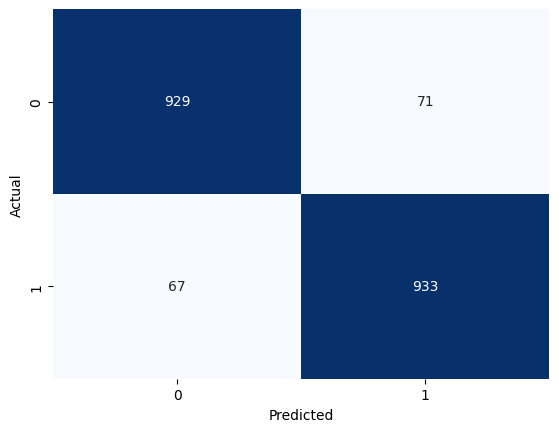

In [ ]:
s = sns.heatmap(confusion_matrix, cmap = 'Blues', annot=True, fmt = 'd',cbar=False)
s.set_xlabel('Predicted')
s.set_ylabel('Actual')

## 6. 테스트


In [ ]:
test.head()

,name,diameter,weight,red,green,blue
5934,grapefruit,10.39,180.08,161,65,13
1389,orange,7.76,141.59,169,98,4
9529,grapefruit,13.12,222.50,154,78,15
8380,grapefruit,12.04,206.27,123,68,15
9323,grapefruit,12.84,218.54,145,87,6


### x,y 분리

In [ ]:
x_test = test.drop('name', axis=1)
y_test = test['name']

In [ ]:
x_test.shape, y_test.shape

((2000, 5), (2000,))

### 스케일링

In [ ]:
s = x_train.std()

x_test_s = (x_test - u) / s
y_test_e = y_test.map(label_dic)

In [ ]:
# to_numpy()
x_test_s = x_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

In [ ]:
type(x_test_s), type(y_test_e)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_test_s.shape, y_test_e.shape

((2000, 5), (2000,))

### 예측

In [ ]:
# 예측
y_pred = clf.predict(x_test_s)

In [ ]:
acc = sum(y_pred==y_test_e)/len(y_test_e) # 정확도
print(acc)

0.9185


## 성능평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix  # confusion_matrix 다시 import

def print_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

    conf_matrix = confusion_matrix(y_true, y_pred)  # 변수명을 conf_matrix로 변경
    s = sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d', cbar=False)
    s.set_xlabel('Predicted')
    s.set_ylabel('Actual')
    plt.show()

acc: 0.9185, prec: 0.9099, recall: 0.9273, f1: 0.9185


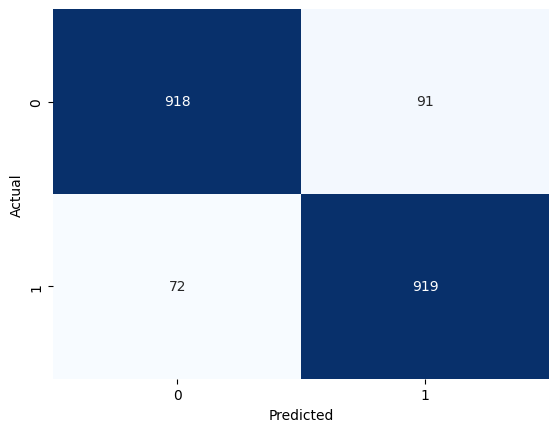

In [ ]:
print_metrics(y_test_e, y_pred)